# Лабораторна робота 4
### Студента групи МІТ-31
### Ярощука Назара Юрійовича


In [40]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as metrics
import pandas as pd
import seaborn as sns

In [41]:

matrix = tf.constant([[1, 2], [3, 4]])
print(matrix)

print(np.square(matrix))

matrix = matrix + 100
print(matrix)

tf1_without_2nd_row = tf.gather(matrix, [0])

print(tf1_without_2nd_row)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
[[ 1  4]
 [ 9 16]]
tf.Tensor(
[[101 102]
 [103 104]], shape=(2, 2), dtype=int32)
tf.Tensor([[101 102]], shape=(1, 2), dtype=int32)


In [42]:
scalar = tf.constant(10)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=10>

In [43]:
scalar.ndim

0

In [44]:
vector = tf.constant([19, 11])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([19, 11])>

In [45]:
vector.ndim

1

In [46]:
mat1 = tf.constant([[1, 2],
                    [3, 4]])
mat1

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]])>

In [47]:
mat1.ndim

2

In [48]:
mat2 = tf.constant([[1., 4.],
                    [3., 2.],
                    [5., 6.]], dtype=tf.float16)

mat2

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[1., 4.],
       [3., 2.],
       [5., 6.]], dtype=float16)>

In [49]:
mat2.ndim

2

In [50]:
tensor = tf.constant([[[1, 2, 3,],
                       [4, 5, 6]],
                      [[7, 8, 9],
                       [10, 11, 12]],
                      [[13, 14, 15],
                       [16, 17, 18]]])
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]])>

In [51]:
tensor.ndim

3

In [52]:
random_1 = tf.random.Generator.from_seed(7)
random_1 = random_1.normal(shape=(4, 2))
random_2 = tf.random.Generator.from_seed(10)
random_2 = random_2.normal(shape=(5, 3))

In [53]:
df2 = pd.DataFrame(np.random.randint(0, 100, (6, 6)), columns=["a1", "a2", "a3", "a4", "a5","a7"])
print(df2)
print(df2.describe(include='all'))

   a1  a2  a3  a4  a5  a7
0  55  93  92  91  34   6
1  11  16  37  19  91  66
2  50  99  67  26  19  80
3  44  15  24  75  53  98
4  57  86  39  11  92  44
5  66  39  58   1  25  66
              a1        a2         a3         a4         a5         a7
count   6.000000   6.00000   6.000000   6.000000   6.000000   6.000000
mean   47.166667  58.00000  52.833333  37.166667  52.333333  60.000000
std    19.177243  39.15099  24.636694  36.815305  32.444825  31.899843
min    11.000000  15.00000  24.000000   1.000000  19.000000   6.000000
25%    45.500000  21.75000  37.500000  13.000000  27.250000  49.500000
50%    52.500000  62.50000  48.500000  22.500000  43.500000  66.000000
75%    56.500000  91.25000  64.750000  62.750000  81.500000  76.500000
max    66.000000  99.00000  92.000000  91.000000  92.000000  98.000000


In [54]:
training_df: pd.DataFrame = pd.DataFrame(
    data={
        'column1': np.random.rand(10),
        'column2': np.random.rand(10),
        'column3': np.random.rand(10),
        'target': np.random.randint(0, 3, 10)
    }
)
features = ['column1', 'column2', 'column3']
print(training_df)

training_dataset = (
    tf.data.Dataset.from_tensor_slices(
        (
            tf.cast(training_df[features].values, tf.float32),
            tf.cast(training_df['target'].values, tf.int32)
        )
    )
)

for features_tensor, target_tensor in training_dataset:
    print(f'features:{features_tensor} target:{target_tensor}')

    column1   column2   column3  target
0  0.951197  0.961247  0.960017       0
1  0.317158  0.729322  0.545981       2
2  0.029879  0.286069  0.134868       0
3  0.559382  0.466707  0.055803       1
4  0.949680  0.962262  0.345196       1
5  0.378446  0.132627  0.190105       1
6  0.334246  0.873494  0.846797       0
7  0.371508  0.527493  0.289499       0
8  0.039977  0.336130  0.324300       1
9  0.305712  0.335303  0.930672       2
features:[0.95119655 0.9612468  0.9600167 ] target:0
features:[0.31715834 0.7293221  0.54598117] target:2
features:[0.02987865 0.28606883 0.13486762] target:0
features:[0.5593819  0.4667066  0.05580265] target:1
features:[0.94968015 0.9622619  0.3451965 ] target:1
features:[0.37844568 0.13262697 0.19010532] target:1
features:[0.3342457  0.8734936  0.84679693] target:0
features:[0.37150806 0.5274933  0.28949934] target:0
features:[0.03997704 0.33613023 0.3243004 ] target:1
features:[0.3057116  0.33530256 0.93067163] target:2


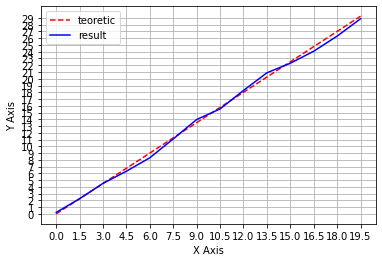

In [55]:
x = np.arange(0, 20, 1.5)
y1 = x * 1.5

adder = np.random.random(len(x)) * 1.4 - 0.7
y2 = y1 + adder

plt.figure()
plt.grid()
plt.xticks(x)
plt.yticks(range(int(x[-1] * 1.5 + 1)))
plt.xlabel('X Axis')
plt.ylabel('Y Axis')

plt.plot(x, y1, "r--", label="teoretic")
plt.plot(x, y2, "b", label="result")

plt.legend()
plt.show()

In [56]:
mae = metrics.mean_absolute_error(y2, y1)
mse = metrics.mean_squared_error(y2, y1)
print(mae)
print(mse)

0.3606369859057236
0.18492953398220355


In [57]:
df = pd.DataFrame(np.array([x, y2, y1]).swapaxes(0,1), columns=['X', 'Y', 'Y_hat'])
print(df)
with open('output.csv', 'w') as f:
    f.write(df.to_csv(index=False))

       X          Y  Y_hat
0    0.0   0.220348   0.00
1    1.5   2.246432   2.25
2    3.0   4.518975   4.50
3    4.5   6.317355   6.75
4    6.0   8.308186   9.00
5    7.5  11.096667  11.25
6    9.0  13.970079  13.50
7   10.5  15.534415  15.75
8   12.0  18.267770  18.00
9   13.5  20.876052  20.25
10  15.0  22.296249  22.50
11  16.5  24.071472  24.75
12  18.0  26.310079  27.00
13  19.5  28.873453  29.25


### Класифікація

In [58]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(100), 
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), 
                metrics=['accuracy'])

model.fit(tf.expand_dims(x, axis=-1), y1, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 394ms/step - loss: -207.5756 - accuracy: 0.0714
Epoch 2/5
1/1 [==============================] - 0s 3ms/step - loss: -207.6431 - accuracy: 0.0714
Epoch 3/5
1/1 [==============================] - 0s 3ms/step - loss: -207.7709 - accuracy: 0.0714
Epoch 4/5
1/1 [==============================] - 0s 3ms/step - loss: -208.8559 - accuracy: 0.0714
Epoch 5/5
1/1 [==============================] - 0s 3ms/step - loss: -208.8548 - accuracy: 0.0714


In [59]:
def plot_decision_boundary(model, X, y):
    
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  x_in = np.c_[xx.ravel(), yy.ravel()]
 
  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [60]:
tf.random.set_seed(42)

X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [61]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])


model.compile(loss=tf.keras.losses.mae, 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) 

model.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)


Epoch 1/100
5/5 [==============================] - 0s 1ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 1ms/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 43.6831 - mae: 43.6831
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [==============================] - 0s 

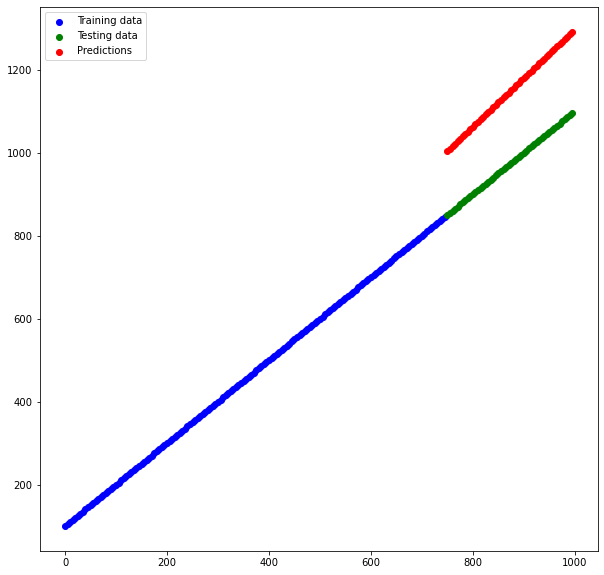

In [62]:
y_reg_preds = model.predict(y_reg_test)

plt.figure(figsize=(10, 10))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend()

In [63]:
model.evaluate(x, y1)

1/1 [==============================] - 0s 108ms/step - loss: 5.4420 - mae: 5.4420


[5.44201135635376, 5.44201135635376]

In [64]:
len(x)

14

In [65]:
X_train, y_train = x[:80], y1[:80]
X_test, y_test = x[80:], y1[80:]

X_train.shape, X_test.shape

((14,), (0,))

In [66]:
tf.random.set_seed(42)

model2 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), 
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.01), 
                metrics=['accuracy'])


history = model2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=25)

Epoch 1/25


C:\Users\mrmus\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 387ms/step - loss: 44.1359 - accuracy: 0.0714
Epoch 2/25
1/1 [==============================] - 0s 3ms/step - loss: 40.6300 - accuracy: 0.0000e+00
Epoch 3/25
1/1 [==============================] - 0s 3ms/step - loss: 37.2420 - accuracy: 0.0000e+00
Epoch 4/25
1/1 [==============================] - 0s 3ms/step - loss: 33.9740 - accuracy: 0.0000e+00
Epoch 5/25
1/1 [==============================] - 0s 3ms/step - loss: 30.8278 - accuracy: 0.0000e+00
Epoch 6/25
1/1 [==============================] - 0s 2ms/step - loss: 27.8047 - accuracy: 0.0000e+00
Epoch 7/25
1/1 [==============================] - 0s 2ms/step - loss: 24.9058 - accuracy: 0.0000e+00
Epoch 8/25
1/1 [==============================] - 0s 2ms/step - loss: 22.1318 - accuracy: 0.0000e+00
Epoch 9/25
1/1 [==============================] - 0s 3ms/step - loss: 19.4830 - accuracy: 0.0000e+00
Epoch 10/25
1/1 [==============================] - 0s 3ms/step - loss: 16.9591 - accuracy: 0.0000e+00
Ep

In [67]:
pd.DataFrame(history.history)

,loss,accuracy
0,44.135864,0.071429
1,40.629967,0.000000
2,37.242012,0.000000
3,33.974022,0.000000
4,30.827776,0.000000
5,27.804688,0.000000
6,24.905811,0.000000
7,22.131836,0.000000
8,19.483002,0.000000
9,16.959110,0.000000


Text(0.5, 1.0, 'Model_2 training curves')

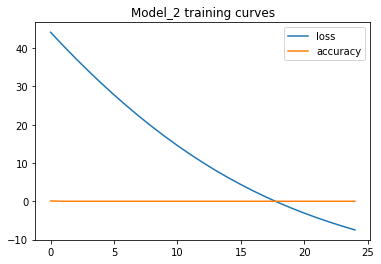

In [68]:
pd.DataFrame(history.history).plot()
plt.title("Model_2 training curves")

### Регресія

In [69]:
input_shape = x[0].shape 
output_shape = y1[0].shape
input_shape, output_shape 

tf.random.set_seed(42)

modelreg = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

modelreg.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

modelreg.fit(tf.expand_dims(x, axis=-1), y1, epochs=80)

Epoch 1/80
1/1 [==============================] - 0s 242ms/step - loss: 9.0669 - mae: 9.0669
Epoch 2/80
1/1 [==============================] - 0s 3ms/step - loss: 8.1083 - mae: 8.1083
Epoch 3/80
1/1 [==============================] - 0s 3ms/step - loss: 7.1504 - mae: 7.1504
Epoch 4/80
1/1 [==============================] - 0s 3ms/step - loss: 6.1924 - mae: 6.1924
Epoch 5/80
1/1 [==============================] - 0s 2ms/step - loss: 5.2344 - mae: 5.2344
Epoch 6/80
1/1 [==============================] - 0s 3ms/step - loss: 4.2764 - mae: 4.2764
Epoch 7/80
1/1 [==============================] - 0s 3ms/step - loss: 3.3185 - mae: 3.3185
Epoch 8/80
1/1 [==============================] - 0s 3ms/step - loss: 2.3605 - mae: 2.3605
Epoch 9/80
1/1 [==============================] - 0s 3ms/step - loss: 1.4025 - mae: 1.4025
Epoch 10/80
1/1 [==============================] - 0s 3ms/step - loss: 0.4446 - mae: 0.4446
Epoch 11/80
1/1 [==============================] - 0s 3ms/step - loss: 0.5258 - mae: 0.

In [70]:
X_train = x[:80]
y_train = y1[:80]

X_test = x[80:] 
y_test = y1[80:]

len(X_train), len(X_test)

(14, 0)

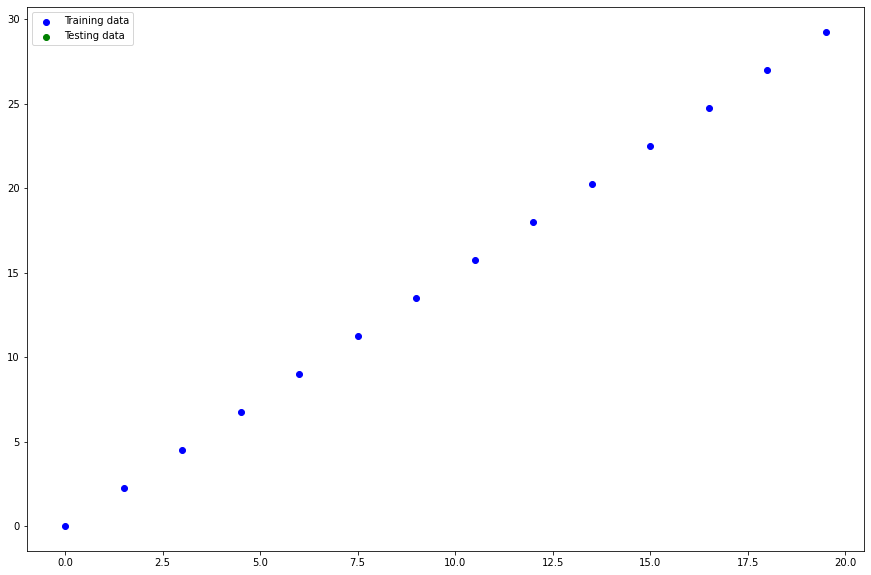

In [71]:
plt.figure(figsize=(15, 10))
plt.scatter(X_train, y_train, c='b', label='Training data')
plt.scatter(X_test, y_test, c='g', label='Testing data')
plt.legend()

In [72]:
modelreg.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [73]:
modelreg.fit(X_train, y_train, epochs=80, verbose=0)

In [75]:
modelreg.predict([30.0])

array([[46.36108]], dtype=float32)